<a href="https://colab.research.google.com/github/soph1125/Computational-Physics/blob/main/Sophia_Pavia_Lab03_Euler_Radioactive_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: The Euler Method for Integrating Ordinary Differential Equantions

*Written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 1*

# Overview

The goal of this lab is to use the **Euler method** to model system that are changing with time.  If we can describe how the system changes with time, then we can determine how the system changes by stepping it forward in time using  tiny intervals of time.  This is the basic idea behind the Euler method.

In [80]:
# import numpy and pyplot here
import numpy as np
import matplotlib.pyplot as plt

# Function Warm Up

(5 points)

Before starting the lab, we will do one problem to keep building our function-writing skills.

**The problem**: Write a function that calculates the mean and standard deviation for a list of numbers.  Hint: the functions `np.mean()` and `np.std()` should be useful!

Function requirements:
* input = list/array of numbers
* return = mean, std

Be sure to include a descriptive comment string at the beginning of your function.


In [81]:
# your function here
def mean_and_std(numbers):
  mean=np.mean(numbers)
  std=np.std(numbers)

  return mean, std

In [82]:
myvalues = np.random.normal(size=100, loc=100, scale=20)

# Feed the following array into your function
mean_vals, std_vals = mean_and_std(myvalues)
# print out the mean and standard deviation
# use a formatted print statement to print two decimal places
print("Mean is {:.2f}".format(mean_vals))
print("Standard Deviation is {:.2f}".format(std_vals))

Mean is 97.91
Standard Deviation is 20.98


# Radioactive Decay

We will use the Euler method to calculate how many radioactive nuclei survive as a function of time.  We talked about Uranium 235, but this could apply to any radioactive nuclei.  In fact, this could apply to anything that is experiencing an exponential decay.

## Differential Equation Described How $N_U$ Changes With Time

The equation that describes how the number of surviving nuclei changes with time is:

$$ \frac{dN}{dt} = - \frac{N}{\tau} $$

where
* N = number of nuclei present
* $\tau$ = half-live of the nuclei

We can solve this particular [`Ordinary Differential Equation`](https://en.wikipedia.org/wiki/Ordinary_differential_equation) by separating variables and integrating:

1. Separate variables
$$ \frac{dN}{N} = - \frac{dt}{\tau} $$
2. Integrate
$$ \int_{N_0}^N \frac{dN}{N} = - \int_0^t \frac{dt}{\tau} $$
$$ ln(N/N_0) = -\frac{1}{\tau} t $$
3. Raise each side to the exponential
$$ e^{ln(N/N_0)} = e^{-\frac{1}{\tau} t} $$
$$ N/N_0 = e^{-\frac{t}{\tau}} $$
4. This gives the analytic solution to how the number of nuclei changes with time:
$$ N(t) = N_0 e^{-\frac{t}{\tau}} $$

So although we can solve this equation analytically, it is a nice example to use for illustrating how the Euler method works.

## Euler Method

We can write the Taylor Expansion for $N(t)$ as

$$ N(t + Δt) ≈ N(t) + \frac{dN}{dt} \Delta t $$

We can then substitute $ \frac{dN}{dt} = - \frac{N}{\tau} $ to get

$$ N(t + Δt) ≈ N(t) - \frac{N}{\tau} \Delta t $$

Below you will write the functions that we need to calculate how the number of surviving Uranium nuclei ($N_U$) changes with time.


### Write function to set up the time and number arrays

(5 points)

Write a function **initialize** that has the following.

* input
  * N0 = initial number of nuclei
  * tau = decay half-life of the nuclei
  * tmax = how long to calculate N and time
  * dt = the time step to use for advancing the system

* the function will
  * calculate nsteps (this is tmax/dt), and make sure nsteps in an integer.
  * define arrays for time *t* and the number of surviving nuclei *n_nuclei*.  These array should initially be set to zero, and they should have be *nsteps* long.
  * set the first element of *n_nuclei* to N0

* return
  * *t, n_nuclei* arrays

In [83]:
# write function initialize here
def initialize(NO,tau, tmax, dt):
  nsteps = int(tmax/dt)
#This makes sure that nsteps in an integer

# These are the arrays for time t and the number of surviving nuclei
  t = np.zeros(nsteps)
  n_nuclei = np.zeros(nsteps)
#These are the initial conditions
  t[0]= 0
  n_nuclei[0]= NO

  return t, n_nuclei

### Write function to implement Euler calculation

(5 points)

Write a function **calculate** that does the following:

* input
  * time array, *t*
  * array containing the number of surviving nuclei at each time step, *n_nuclei*
  * dt
  * tau


* the function will
  * loop over arrays and calculate:

  ```
  n_nuclei[i] = n_nuclei[i-1] - n_nuclei[i-1]/tau * dt
  t[i] = t[i-1] + dt
  ```  

* return
  *  *t, n_nuclei* arrays

In [84]:
# write your calculate function here
#calculating the number of surviving nuclei at each time step
def calculate (t,n_nuclei, dt, tau):
#This loops over the arrays and calculates the number of surviving nuclei
  for i in range(1,len(t)):
    n_nuclei[i] = n_nuclei[i-1]-n_nuclei[i-1] / tau * dt
    t[i] = t[i-1] +dt

  return t, n_nuclei
#Remember t is a time array and n_nuclei is an array as well

### Running your code

(5 points)

You now just need to set up the initial values and call your functions.

Give the variables the following values:

* start with 100 nuclei
* set the decay half-life to 1 second
* set tmax to 5 seconds
* use a time step of 0.05 s

When you are finished, check your code with your instructor or LA.

In [85]:
############################################################
# This is your main program that will call the functions.
############################################################



# define initial values
N0 = 100
tau = 1.0
tmax = 5.0
dt = 0.05

# call initialize function
t,n_nuclei = initialize(N0,tau, tmax, dt)

# call your calculate function
t,n_nuclei = calculate(t,n_nuclei, dt, tau)


### Visualizing your results

(5 points)

* Make a plot of the number of nuclei versus time.
* Plot the analytic solution for comparison.

Question:  How well do your calculated values compare with the analytic solution?

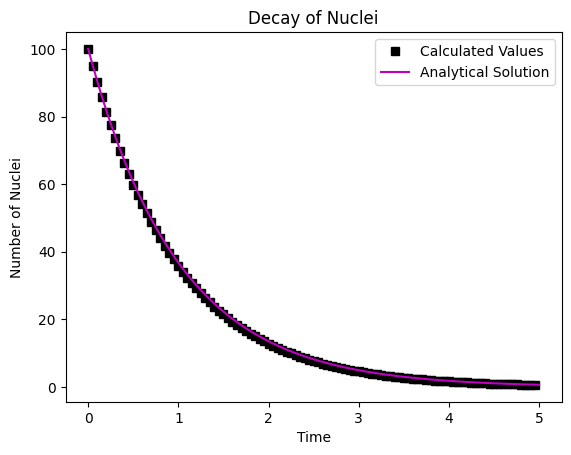

In [86]:
# plot the number of nuclei versus time using black squares
plt.figure()
plt.plot(t, n_nuclei,'ks', label='Calculated Values')
plt.xlabel('Time')
plt.ylabel('Number of Nuclei')
plt.title('Decay of Nuclei')


# plot the analytic solution using a solid black line
# 𝑁(𝑡)=𝑁0𝑒−𝑡/𝜏  is the analytical solution
tline=np.linspace(0,tmax,100)
yfit=N0 * np.exp(-tline/tau)
plt.plot(tline, yfit, 'm-', label='Analytical Solution')
plt.legend()

### Investigating how the timesteps affect the accuracy of the approximation

(5 points)

You should find that your calculated values do a good job at recovering the analytic solution.  In this section we will see how the results are affected if we choose a different value for dt.

Specifically, you should calculate the number of nuclei versus time using a time steps of 0.05 sec, 0.2 sec, and 0.5 sec.  Save the output as different names so you can plot all three together with the analytic solution.

Plot the results.
* plot the analytic solution with a line.
* plot the results from the Euler approximation with points, and use different colors and shapes for each time step.
* Make sure your plot has a legend that describes

In [87]:
# code to get number of nuclei and time for dt = 0.05 s
dt_005 = 0.05
time_array_005, nuclei_array_005 = initialize(N0, tau, tmax, dt_005)
time_array_005, nuclei_array_005 = calculate(time_array_005, nuclei_array_005, dt_005, tau)
# code to get number of nuclei and time for dt = 0.2 s
dt_02 = 0.2
time_array_02, nuclei_array_02 = initialize(N0, tau, tmax, dt_02)
time_array_02, nuclei_array_02 = calculate(time_array_02, nuclei_array_02, dt_02, tau)
# code to get number of nuclei and time for dt = 0.5 s
dt_05 = 0.5
time_array_05, nuclei_array_05 = initialize(N0, tau, tmax, dt_05)
time_array_05, nuclei_array_05 = calculate(time_array_05, nuclei_array_05, dt_05, tau)

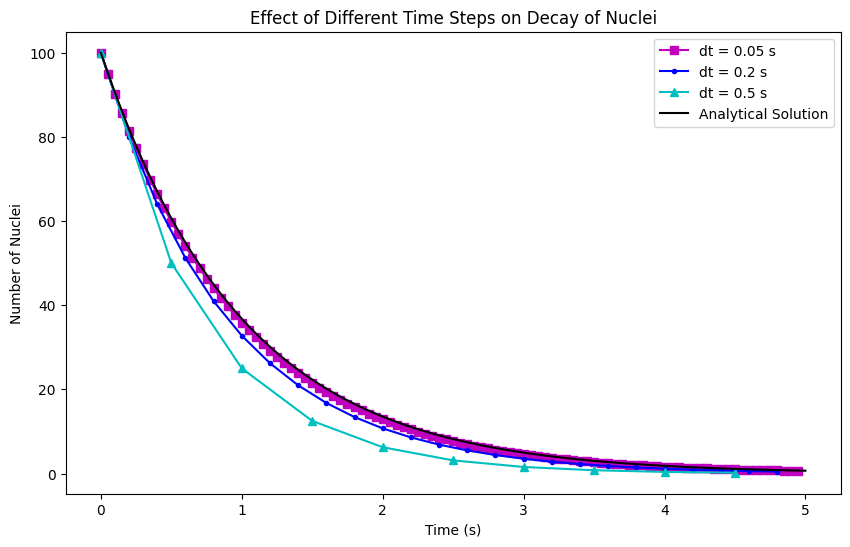

In [92]:
# code to plot the 3 different results
plt.figure(figsize=(10, 6))
# Plotting the results from the Euler approximation
plt.plot(time_array_005, nuclei_array_005, 'ms-', label='dt = 0.05 s')
plt.plot(time_array_02, nuclei_array_02, 'b.-', label='dt = 0.2 s')
plt.plot(time_array_05, nuclei_array_05, 'c^-', label='dt = 0.5 s')
plt.xlabel('Time (s)')
plt.ylabel('Number of Nuclei')
plt.title('Effect of Different Time Steps on Decay of Nuclei')
# code to plot the analytic solution
plt.plot(tline, yfit, 'k-', label='Analytical Solution')
plt.legend()


# Summarize Your Results



Complete your wiki page for this lab.  Your wiki should have the following elements.

## Background
1. Define what an ordinary differential equation is.
1. Describe what a Taylor Expansion is and why it is useful
1. Describe the general form of the Euler Method and why this is useful for approximating a solution to a differential equation

## This Lab
1. Describe how we apply the Euler method to approximate how the number of Uranium atoms declines as a function of time.
1. Note that in this particular example, we can solve the equation analytically.  Nonetheless, this provides a nice way to introduce the Euler method and examine how some of our numerical choices affect the accuracy of our result.
1. Describe does the time step in the Euler method affect the accuracy of your results.  Include the graph that illustrates how the time step affects the accuracy of your results.